# Task 2c Visualization

In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [2]:
# Enable autoreloading if import packages are changed
%load_ext autoreload
%autoreload 2

In [3]:
# Set up python path 
import sys
import os
import cv2
import numpy as np 
import torch 
import matplotlib.pyplot as plt
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
# Read data
img1 = cv2.imread("../data/Chess.png")
color1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
gray1 = cv2.cvtColor(color1, cv2.COLOR_RGB2GRAY)

img2 = cv2.imread("../data/ChessRotated.png")
color2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
gray2 = cv2.cvtColor(color2, cv2.COLOR_RGB2GRAY)

## Compute and Visualize Matches

/home/student/3dcv/3dcv_group_2313771113/task2c/rhog.py:44: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  I = torch.tensor(I, dtype = torch.float)
/home/student/3dcv/3dcv_group_2313771113/task2c/rhog.py:60: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rotated_grad_x = torch.tensor(rotated_grad_x,dtype = torch.float)
/home/student/3dcv/3dcv_group_2313771113/task2c/rhog.py:63: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  rotated_grad_y = torch.tensor(rotated_grad_y,dtype = torch.float)
/home/student/3dcv/3dcv_group_2313771113/task2c/rhog.

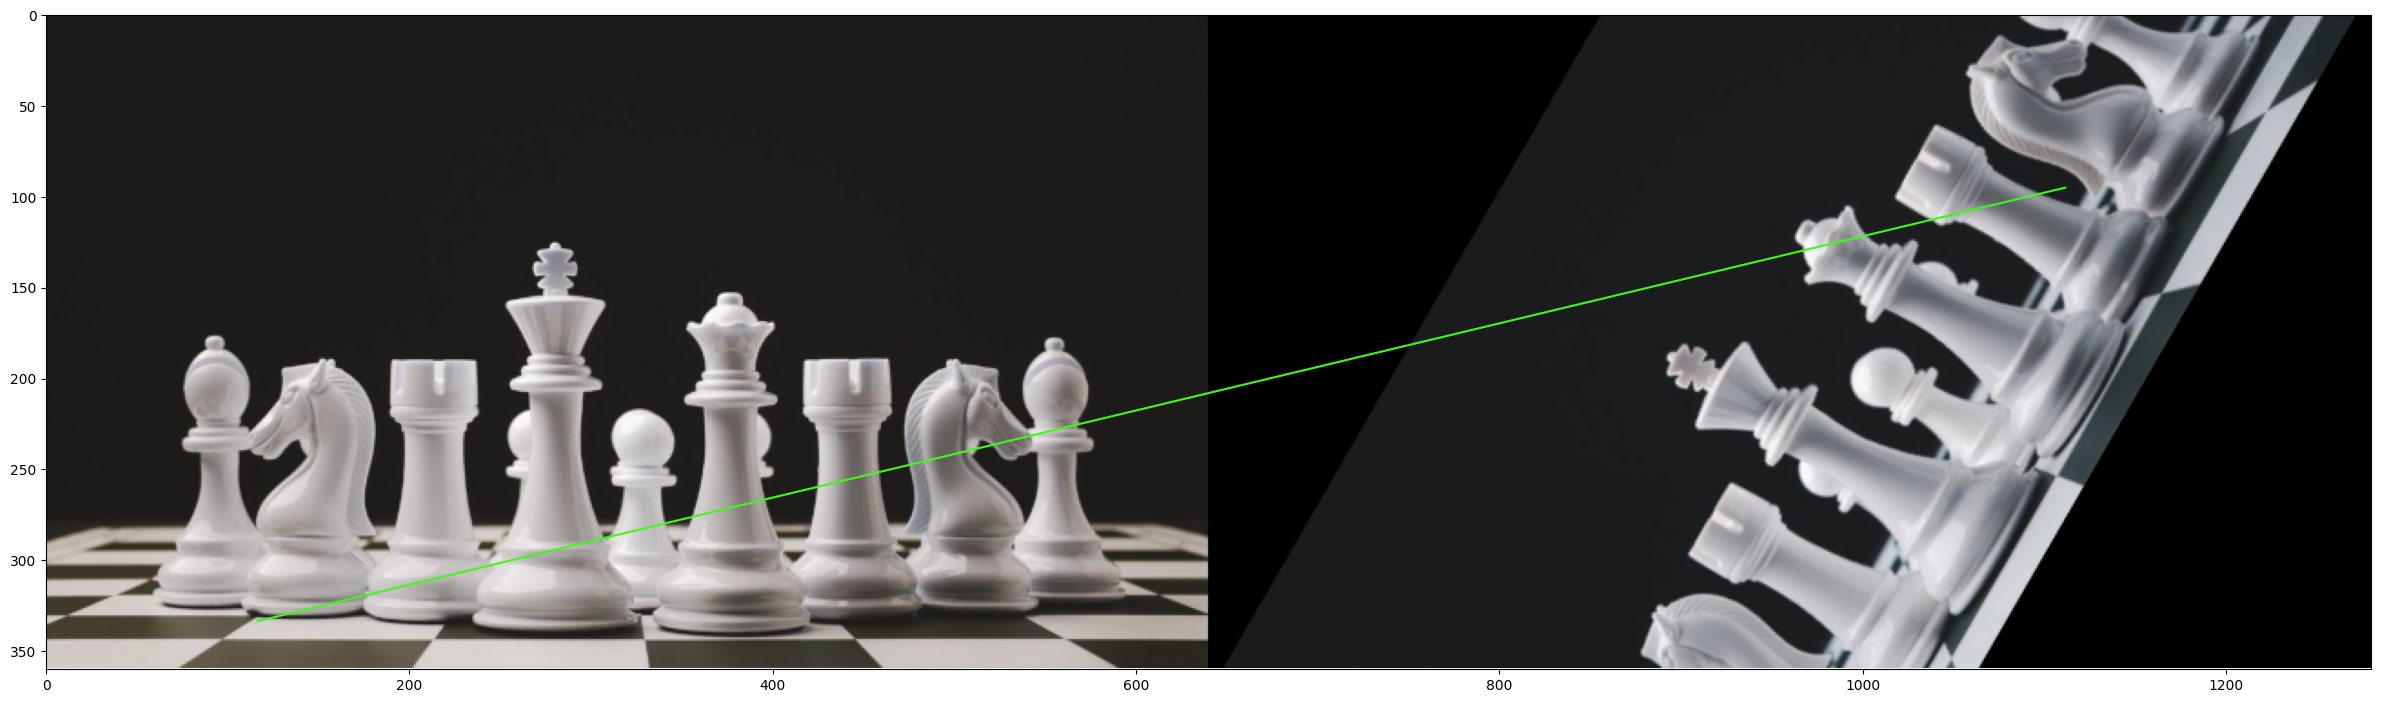

In [5]:
from rhog import RHOG
group_id = int(open('../group_id.txt', 'r').read())

hog = RHOG() 

img1 = cv2.imread("../data/Chess.png")
color1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
gray1 = cv2.cvtColor(color1, cv2.COLOR_RGB2GRAY)

img2 = cv2.imread("../data/ChessRotated.png")
color2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
gray2 = cv2.cvtColor(color2, cv2.COLOR_RGB2GRAY)

# Fields in keypoints from SIFT detector:
# x, y, angle, octave, response, size
keypoints1 = torch.tensor(np.loadtxt('keypoints1.txt'), device=device)
keypoints2 = torch.tensor(np.loadtxt('keypoints2.txt'), device=device)

hog = RHOG()
desc1 = hog.compute_descriptors(torch.tensor(gray1, device=device), keypoints1)
desc2 = hog.compute_descriptors(torch.tensor(gray2, device=device), keypoints2)

from skimage.feature import plot_matches
import matplotlib.pyplot as plt
import cv2
sys.path.append('..')
from task2a.match import match

matches = match(
        descriptors1=desc1,
        descriptors2=desc2,
        device=device,
        dist="euclidean",
        ratio=0.95,
        threshold=0, # Adjust value 
    )

fig, axs = plt.subplots(figsize=(30.0, 20.0))
k = 10
plot_matches(
    axs,
    img1,
    img2,
    keypoints1[:,0:2].fliplr().cpu(),
    keypoints2[:,0:2].fliplr().cpu(),
    matches[:k, :],
    alignment="horizontal",
    only_matches=True,
)

plt.show()